## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

##  II. Importing and understanding our dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\shamb\Documents\Project_MachineLearning\main.csv') 


Shape of dataset

In [3]:
dataset.shape

(1025, 14)

Printing out a few columns

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
333,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
805,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
225,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
633,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
150,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


Description

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


we have no missing values

## Are there duplicate value present

In [8]:
dataset.duplicated().sum()

723

In [9]:
# 723 rows were duplicate so to remove the duplicate rows use drop duplicate function
dataset=dataset.drop_duplicates()

In [10]:
dataset.shape

(302, 14)

In [11]:
info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl 1=true < 120mg/dl 0 = false","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl 1=true < 120mg/dl 0 = false
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Analysing the 'target' variable

In [12]:
dataset["target"].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([0, 1], dtype=int64)

Clearly, this is a classification problem, with the target variable having values '0' and '1'

##  Checking correlation between columns

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

#  Exploratory Data Analysis (EDA)

1    164
0    138
Name: target, dtype: int64


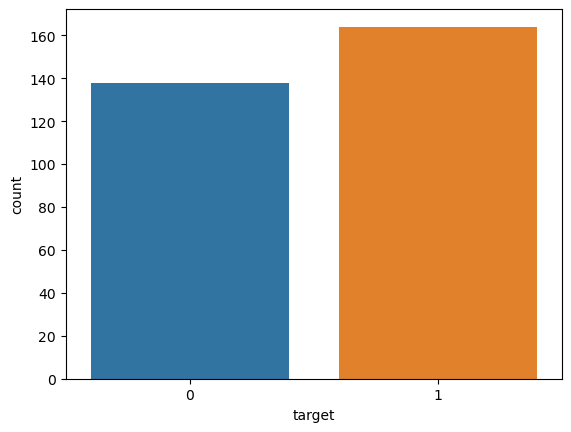

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

Percentage of patience with heart problems: 54.12541254125413
Percentage of patience with heart problems: 45.54455445544554


## We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

In [17]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

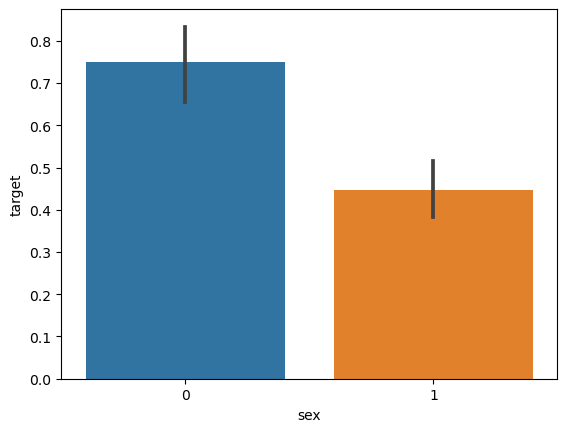

In [18]:
sns.barplot(dataset["sex"],y)

We notice, that females are more likely to have heart problems than males

## Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

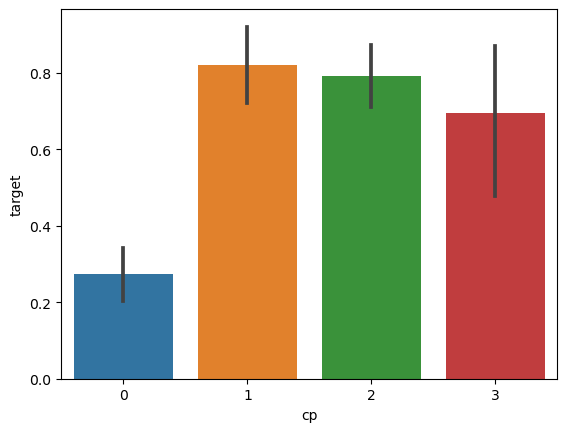

In [20]:
sns.barplot(dataset["cp"],y)


We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

## Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

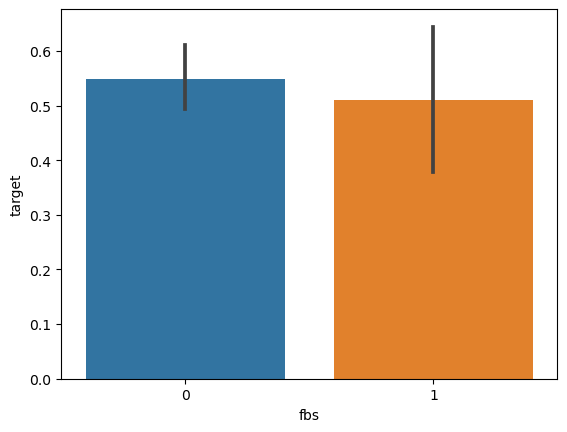

In [23]:
sns.barplot(dataset["fbs"],y)

Nothing extraordinary here

## Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

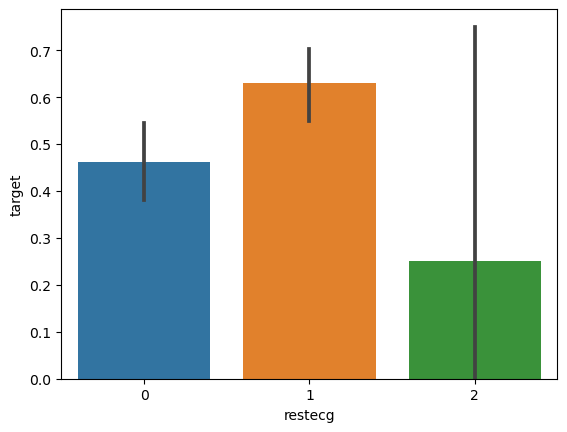

In [25]:
sns.barplot(dataset["restecg"],y)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

## Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

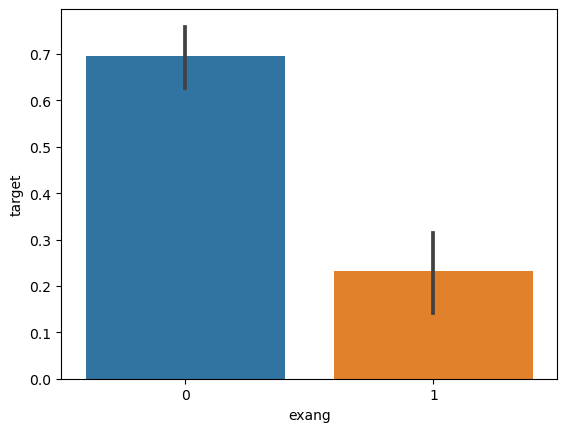

In [27]:
sns.barplot(dataset["exang"],y)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

## Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

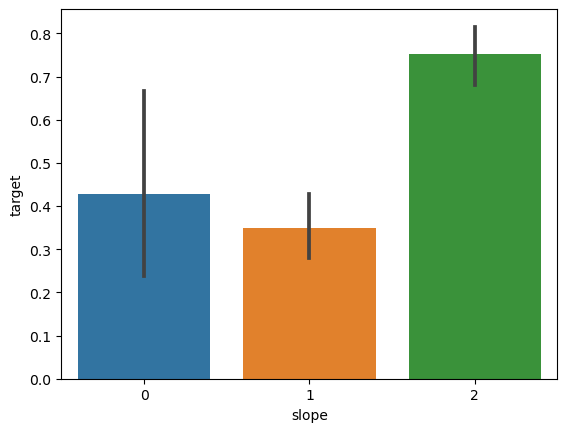

In [29]:
sns.barplot(dataset["slope"],y)

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

## Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

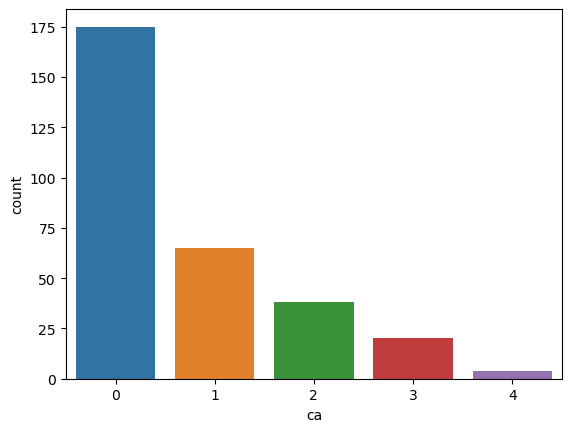

In [32]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

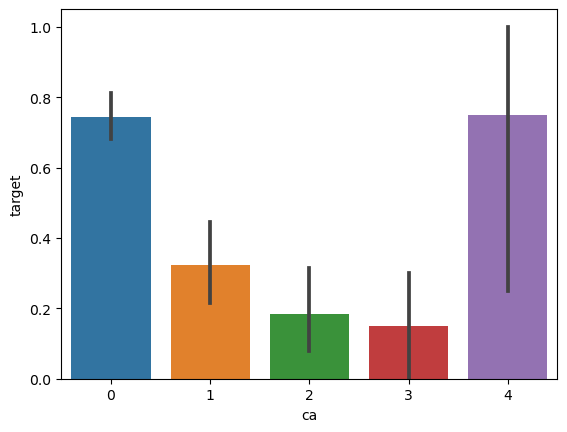

In [33]:
sns.barplot(dataset["ca"],y)


ca=4 has astonishingly large number of heart patients

## Analysing the 'thal' feature

In [34]:
dataset["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

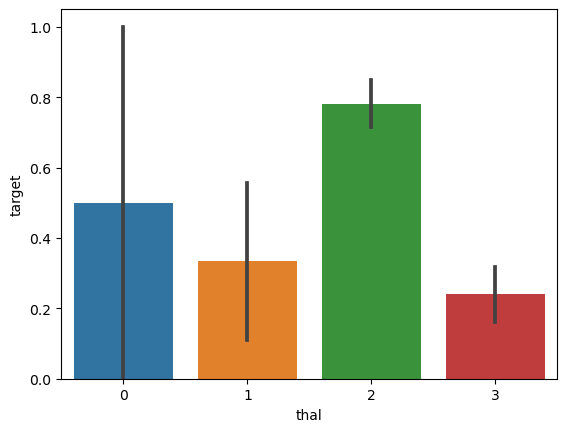

In [35]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

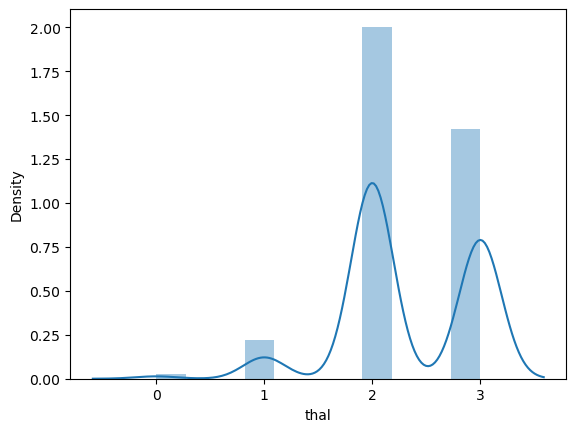

In [36]:
sns.distplot(dataset["thal"])

## Checking for outliers

We will check for the outliers using the Boxplot 
Box plot applied on Numerical data.Median Middle value after sorting percentile 25 prcentile  Interquartile range IQR = Q3-Q1 Minimum value these are not the minimum value of the dataset it is calculated by using the formula min value = Q1+1.5IQR maximum value SimilRLY THE Mx value is also calculated using formula Q3+ 1.5IQR

## AGE

<AxesSubplot:xlabel='age'>

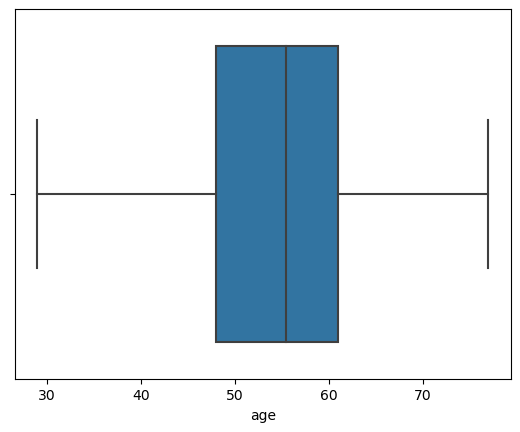

In [37]:
sns.boxplot(dataset['age'])

No outliers present in AGE

## Thal

<AxesSubplot:xlabel='thal'>

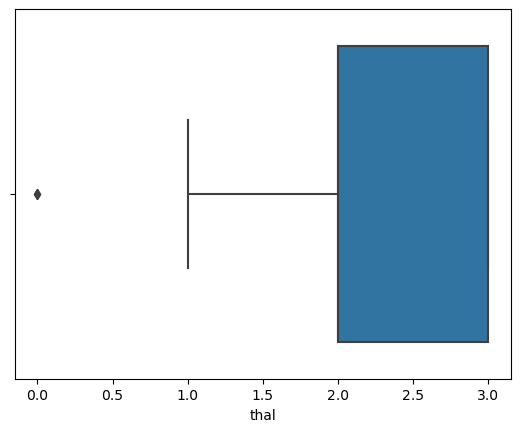

In [38]:
sns.boxplot(dataset['thal'])

Outliers present in Thal

## Ca

<AxesSubplot:xlabel='ca'>

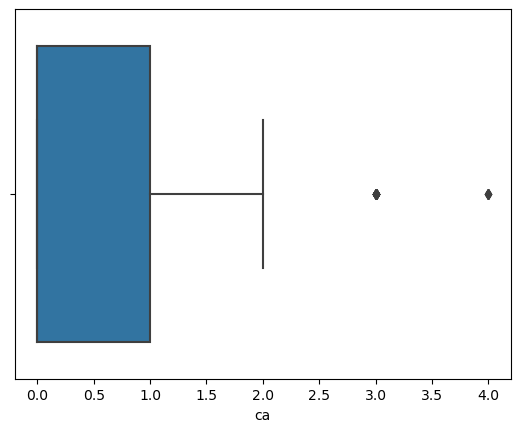

In [39]:
sns.boxplot(dataset['ca'])

## Trestbps

<AxesSubplot:xlabel='trestbps'>

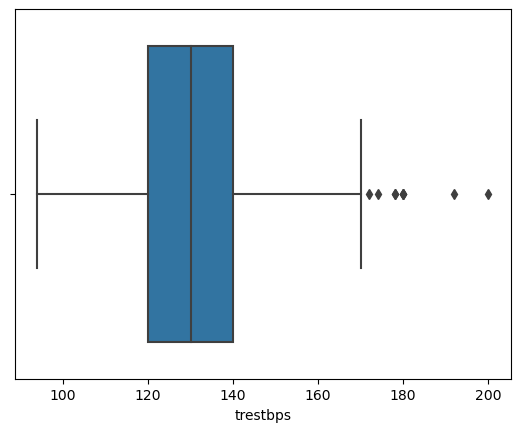

In [40]:
sns.boxplot(dataset['trestbps'])

## Chol

<AxesSubplot:xlabel='chol'>

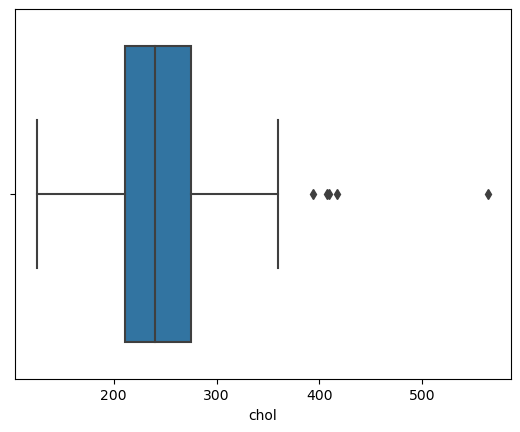

In [41]:
sns.boxplot(dataset['chol'])

## Thalach

<AxesSubplot:xlabel='thalach'>

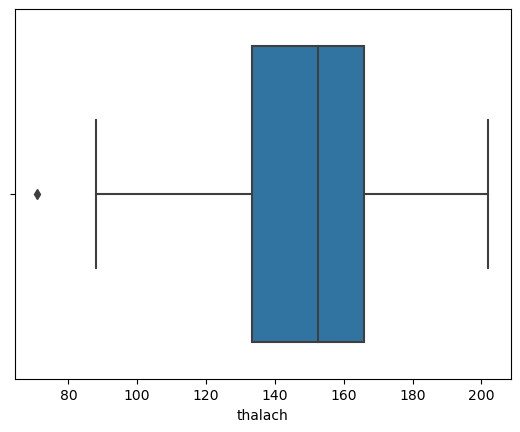

In [42]:
sns.boxplot(dataset['thalach'])

## Oldpeak

<AxesSubplot:xlabel='oldpeak'>

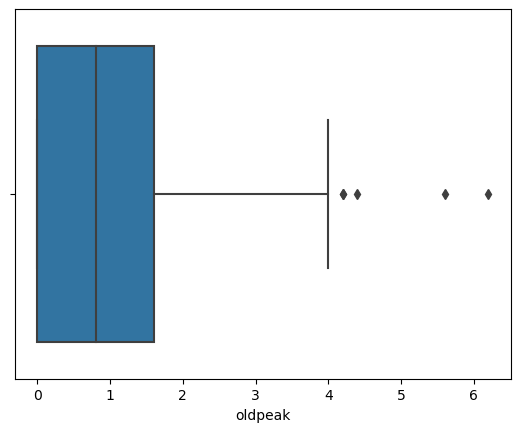

In [43]:
sns.boxplot(dataset['oldpeak'])

## outliers in trestbps

In [44]:
# Finding the IQR
percentile25 = dataset['trestbps'].quantile(0.25)
percentile75 = dataset['trestbps'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

20.0

In [45]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 170.0
Lower limit 90.0


In [46]:
dataset[dataset['trestbps'] > upper_limit] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [47]:
dataset[dataset['trestbps'] < lower_limit]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [48]:
dataset = dataset[dataset['trestbps'] < upper_limit]
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<AxesSubplot:xlabel='trestbps'>

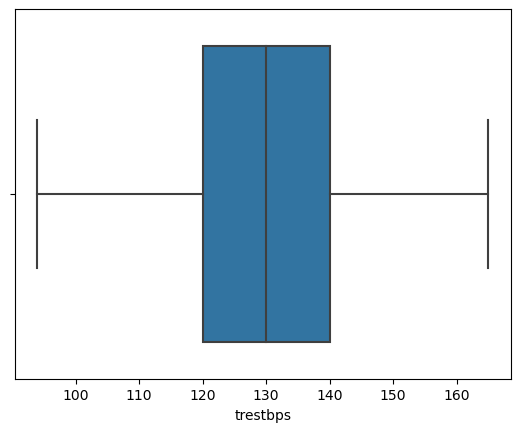

In [49]:
sns.boxplot(dataset['trestbps'])

## outliers in chol

In [50]:
# Finding the IQR
percentile25 = dataset['chol'].quantile(0.25)
percentile75 = dataset['chol'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

62.0

In [51]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 366.0
Lower limit 118.0


In [52]:
dataset[dataset['chol'] > upper_limit] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [53]:
dataset[dataset['chol'] < lower_limit] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [54]:
dataset = dataset[dataset['chol'] < upper_limit]
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<AxesSubplot:xlabel='chol'>

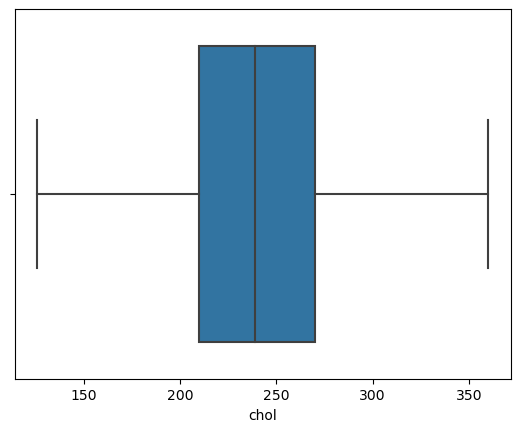

In [55]:
sns.boxplot(dataset['chol'])

 ## outliers in thalach

In [56]:
# Finding the IQR
percentile25 = dataset['thalach'].quantile(0.25)
percentile75 = dataset['thalach'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

36.0

In [57]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 222.0
Lower limit 78.0


In [58]:
dataset[dataset['thalach'] > upper_limit] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [59]:
dataset[dataset['thalach'] < lower_limit] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [60]:
dataset = dataset[dataset['thalach'] > lower_limit]
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<AxesSubplot:xlabel='thalach'>

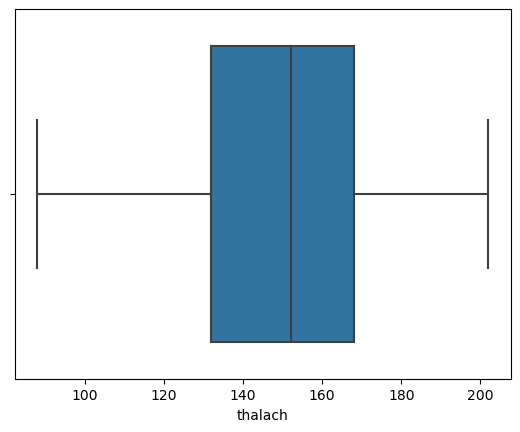

In [61]:
sns.boxplot(dataset['thalach'])

## outliers in oldpeak

In [62]:
# Finding the IQR
percentile25 = dataset['oldpeak'].quantile(0.25)
percentile75 = dataset['oldpeak'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

1.6

In [63]:
dataset[dataset['oldpeak'] > upper_limit] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [64]:
dataset[dataset['oldpeak'] < lower_limit] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [65]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Spliting of dataset into test and train

In [66]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)

In [67]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=17)

X_train.shape, X_test.shape

((226, 13), (57, 13))

## MinMax Scaler

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
preprocessed_data=scaler.fit_transform(x)
df=pd.DataFrame(preprocessed_data)

## SVM


In [69]:
#Create a svm Classifier
from sklearn import svm
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(X_test)

In [70]:
print("accuracy of train is : ",ml.score(X_train,y_train)*100)

accuracy of train is :  85.39823008849558


In [71]:
print("accuracy of test is : ",ml.score(X_test,y_test)*100)

accuracy of test is :  91.22807017543859


## Bernoulli Naive Bayes

In [77]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [78]:
Y_pred_nb.shape

(57,)

In [79]:
from sklearn.metrics import accuracy_score
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.96 %


## Gaussian Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

nb1 = GaussianNB()

nb1.fit(X_train,y_train)

Y_pred_nb1 = nb1.predict(X_test)

In [84]:
Y_pred_nb1.shape

(57,)

In [85]:
from sklearn.metrics import accuracy_score
score_nb1 = round(accuracy_score(Y_pred_nb1,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb1)+" %")

The accuracy score achieved using Naive Bayes is: 87.72 %


In [89]:
from sklearn.metrics import classification_report
cr = classification_report(y_pred,y_test)

print("Accuracy is:")
print(cm)

Accuracy is:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.87      0.93        38

    accuracy                           0.91        57
   macro avg       0.90      0.93      0.91        57
weighted avg       0.93      0.91      0.91        57



In [75]:
pickle.dump(ml,open('heart.pkl','wb'))

In [76]:
input_data = (68,0,2,120,211,0,0,115,0,1.5,1,0,2)

# changing the input_data to numpy array
arr = np.array(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = arr.reshape(1,-1)

prediction = ml.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not HEART DISEASE')
else:
  print('The person is HEART DISEASE') 

[1]
The person is HEART DISEASE
